# Test hypothesis that lab strains enriched for efeU inactivation

In [1]:
import seaborn as sns
import pandas as pd
%matplotlib inline

/usr/lib/python2.7/site-packages/scipy/special/__init__.py:640: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._ufuncs import *
/usr/lib/python2.7/site-packages/scipy/linalg/basic.py:17: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._solve_toeplitz import levinson
/usr/lib/python2.7/site-packages/scipy/linalg/__init__.py:207: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._decomp_update import *
/usr/lib/python2.7/site-packages/scipy/special/_ellip_harm.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._ellip_harm_2 import _ellipsoid, _ellipsoid_norm
/usr/lib/python2.7/site-packages/scipy/interpolate/_bsplines.py:10: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _bspl
/usr/lib/p

### Load PATRIC result and filter out some rows

In [2]:
COL_ID = 'Genome ID'

In [3]:
patric = pd.read_csv('/home/laurence/ME/data/Amitesh/PATRIC_genome_feature_efeU.csv', dtype={'Genome ID':object})
exclude_genomes = ['Escherichia coli', 'Escherichia coli DSM 30083 = JCM 1649 = ATCC 11775']
patric = patric[~patric.Genome.isin(exclude_genomes)]   # want specific strains
print(patric.shape)

(12626, 21)


### Filter out non-coli species

In [4]:
ecoli_names = pd.read_csv('../only_ecoli_names.csv', dtype={'Genome ID':object})
ecoli_ids = ecoli_names['Genome ID'].unique()
print("E coli: %d"%len(ecoli_ids))

patric = patric[ patric['Genome ID'].isin(ecoli_ids)]
patric.shape

E coli: 12117


(12479, 21)

# Test 1: If a given organism has >1 efeU product, those are probably fragments

In [5]:
df_pars = patric[[COL_ID,'Product','Length']].drop_duplicates()
df_pars.shape

(12464, 3)

In [6]:
df_lengths = df_pars.groupby(COL_ID).apply(lambda x: ';'.join([str(xi) for xi in x['Length']])).reset_index(name='Lengths')

In [7]:
df_lengths = df_pars.groupby(COL_ID).apply(lambda x: pd.Series(
    {
        'Lengths':';'.join([str(xi) for xi in x['Length']]),
        'Count':len(x),
        'TotLength':sum(x['Length'])
    }
)).reset_index()

In [8]:
df_ids = patric[['Genome','Genome ID']].drop_duplicates()
df_lengths = pd.merge(df_lengths, df_ids, on=COL_ID)

In [9]:
df_lengths.Count.unique()

array([1, 2, 3, 4])

In [10]:
df_lengths[ df_lengths.Count>2]['Genome'].unique()

array(['Escherichia coli JCM 18426', 'Escherichia coli JCM 5491',
       'Escherichia coli TOP293-4', 'Escherichia coli strain RCE04',
       'Escherichia coli strain RCE01', 'Escherichia coli strain RCE05',
       'Escherichia coli strain 32122', 'Escherichia coli strain EF467',
       'Escherichia coli strain MOD1-EC5472',
       'Escherichia coli strain MOD1-EC5454',
       'Escherichia coli strain MOD1-EC5440',
       'Escherichia coli strain MOD1-EC5445',
       'Escherichia coli strain MOD1-EC5443',
       'Escherichia coli strain MOD1-EC1686',
       'Escherichia coli strain SMN197SH3',
       'Escherichia coli strain SMN152SH1',
       'Escherichia coli strain SMN013SH2',
       'Escherichia coli strain SP-16 Combo',
       'Escherichia coli strain 2014C-3011',
       'Escherichia coli strain RU1 BHI6'], dtype=object)

## Spot check
- MG1655:
    - efeU_1 (111 bp)
    - efeU_2 (732 bp)
- Nissle 1917:
    - efeU (ycdN): ferrous iron permease
- O157:H7
    - efeUOB operon: tripartite Fe(II) transport system

## MG1655: PASS (but filter subsets of MG1655)

In [11]:
df_lengths[ df_lengths.Genome.str.contains('MG1655')]

,Genome ID,Count,Lengths,TotLength,Genome
2414,511145.12,2,120;720,840,Escherichia coli str. K-12 substr. MG1655
2415,511145.180,2,120;720,840,Escherichia coli str. K-12 substr. MG1655
2416,511145.181,2,120;720,840,Escherichia coli str. K-12 substr. MG1655
2417,511145.182,2,120;720,840,Escherichia coli str. K-12 substr. MG1655
2418,511145.183,2,120;720,840,Escherichia coli str. K-12 substr. MG1655
2419,511145.184,2,720;120,840,Escherichia coli str. K-12 substr. MG1655
2420,511145.185,2,720;120,840,Escherichia coli str. K-12 substr. MG1655
2421,511145.186,2,720;120,840,Escherichia coli str. K-12 substr. MG1655
2422,511145.208,2,120;720,840,Escherichia coli str. K-12 substr. MG1655
2423,511145.209,2,720;120,840,Escherichia coli str. K-12 substr. MG1655


## Nissle 1917: PASS. One product per genome ID.

In [12]:
df_lengths[ df_lengths.Genome.str.contains('Nissle')]

,Genome ID,Count,Lengths,TotLength,Genome
2335,316435.10,1,720,720,Escherichia coli Nissle 1917
2336,316435.3,1,831,831,Escherichia coli Nissle 1917


## O157:H7: PASS. One product of 831 bp. Again, filter out subset.

In [13]:
df_lengths[ df_lengths.Genome.str.contains('O157:H7')]

,Genome ID,Count,Lengths,TotLength,Genome
828,1240385.3,1,831,831,Escherichia coli O157:H7 str. H093800014
1220,1282359.4,1,831,831,Escherichia coli O157:H7 str. EC1825
1248,1286877.4,1,831,831,Escherichia coli O157:H7 str. TW14313
1283,1328859.4,1,831,831,Escherichia coli O157:H7 str. SS17
1285,1330457.6,1,831,831,Escherichia coli O157:H7 str. SS52
1318,1343836.3,1,831,831,Escherichia coli O157:H7 str. F8092B
1325,1387069.3,1,831,831,Escherichia coli O157:H7 str. 09BKT048303
1326,1387070.3,1,831,831,Escherichia coli O157:H7 str. 08BKT061141
1327,1387071.3,1,831,831,Escherichia coli O157:H7 str. T1543_06
1803,1446609.3,1,831,831,Escherichia coli O157:H7 str. 06-3745


## Odd ones: >2 fragments

In [14]:
df_lengths[ df_lengths.Count>2]

,Genome ID,Count,Lengths,TotLength,Genome
825,1236522.3,3,177;420;243,840,Escherichia coli JCM 18426
827,1236527.3,3,237;390;243,870,Escherichia coli JCM 5491
1229,1286337.3,3,390;318;177,885,Escherichia coli TOP293-4
2535,562.10476,3,243;417;177,837,Escherichia coli strain RCE04
2536,562.10477,3,243;417;177,837,Escherichia coli strain RCE01
2537,562.10478,3,243;417;237,897,Escherichia coli strain RCE05
2579,562.10529,4,81;246;591;243,1161,Escherichia coli strain 32122
2782,562.11553,3,369;243;255,867,Escherichia coli strain EF467
4385,562.18823,3,246;222;153,621,Escherichia coli strain MOD1-EC5472
4406,562.18844,3,132;93;492,717,Escherichia coli strain MOD1-EC5454


# Conclusion:

### For now, limit analysis to homologs with 1 or 2 efeU gene products (exclude if 3 or more)

In [15]:
print(df_lengths[ df_lengths.Count<=2].TotLength.min())
print(df_lengths[ df_lengths.Count<=2].TotLength.max())

111
2781


In [16]:
dsplot = df_lengths[ (df_lengths.Count<=2) ].drop_duplicates().groupby('Count')['Genome ID'].count().reset_index()
dsplot.head()

,Count,Genome ID
0,1,11792
1,2,305


In [17]:
dsplot[COL_ID].sum()

12097

/usr/lib/python2.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


([<matplotlib.patches.Wedge at 0x7fc3f923a8d0>,
 [Text(-1.09655,0.0870384,'Full (11792)'),
  Text(1.29592,-0.102864,'Fragmented (305)')],
 [Text(-0.598119,0.0474755,'97%'), Text(0.797492,-0.0633007,'2.5%')])

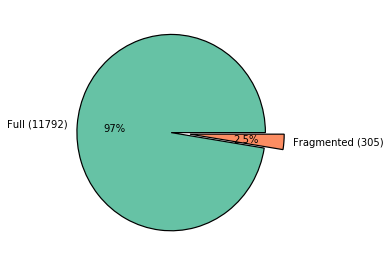

In [18]:
import matplotlib.pyplot as plt

sizes  = dsplot[COL_ID]
colors = sns.color_palette('Set2', len(set(sizes)))
#labels = ['Full','Fragmented']
labels = ['Full (%d)'%sizes[0], 'Fragmented (%d)'%sizes[1]]
explode = [0, 0.2]
g  = sns.FacetGrid(dsplot, aspect=1, size=4)
ax = g.axes.flatten()[0]
ax.pie(sizes, colors=colors, labels=labels, autopct='%.2g%%', explode=explode, wedgeprops = {'linewidth': 1.2, 'edgecolor':'#000000'})

### Double check that if the Count=1, gene is sufficiently long

In [19]:
df_one = df_lengths[ df_lengths.Count==1]
print(df_one.shape)
print(df_one[ df_one.TotLength>800].shape)

(11792, 5)
(11743, 5)


In [20]:
df_one.TotLength.min()

111

In [21]:
from __future__ import division

df_one[ df_one.TotLength >= 830].shape[0] / df_lengths.shape[0]

0.9682264586943963

In [22]:
# Known PECs
len(df_lengths[df_lengths.Genome.str.contains('PEC')].Genome.unique())

139

In [23]:
df_pec = df_lengths[df_lengths.Genome.str.contains('PEC')]
df_pec.groupby('Count').count()

,Genome ID,Lengths,TotLength,Genome
Count,,,,
1,137,137,137,137
2,2,2,2,2


# Metadata of genomes: are all disrupted efeU strains lab evolved or otherwise?

In [24]:
df_meta = pd.read_csv('/home/laurence/ME/data/Amitesh/PATRIC_genome.csv', dtype={'Genome ID':object})

/usr/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,60) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [25]:
df_data = pd.merge(df_lengths, df_meta, on=COL_ID)
### Only keep labels 1 and 2
df_data = df_data[df_data.Count <= 2]
df_data = df_data[~((df_data.Count==1) & (df_data.TotLength<830))]

In [26]:
df_data[ df_data['Genome ID'].isin(ecoli_ids)].shape

(12031, 72)

### Convert categorical to sklearn compatible encoder

### Choose metadata that are possible features

In [27]:
feature_cols = ['Isolation Source', 'Isolation Country', 'Isolation Comments',
                'Host Name', 'Host Health', 'Body Sample Site',
                'Other Clinical', 'AntiMicrobial Resistance', 'Cell Shape', 'Motility', 'Sporulation',
                'Temperature Range', 'Salinity', 'Oxygen Requirement', 'Habitat', 'Disease']

In [28]:
df_train = df_data[['Genome ID', 'Genome', 'Count', 'Lengths', 'TotLength'] + feature_cols]

In [29]:
columns  = ['Isolation Source', 'Isolation Comments']
df_train.loc[:,'is_isolate'] = df_train.apply(lambda x: any(['isolate' in x[c].lower() for c in columns if isinstance(x[c],str)]), axis=1)

/usr/lib/python2.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/lib/python2.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [30]:
df_train.loc[ df_train.Genome.str.contains('ECO3347'),'Isolation Source'] = 'urine'

In [31]:
# df_train.to_csv('df_train_R03_062818.csv', index=False)

## Keyword search

In [32]:
df_src_len = df_train[['Genome ID','Genome','Isolation Source']]
df_src_len.loc[:,'IS_len'] = df_src_len['Isolation Source'].apply(lambda x: len(x) if isinstance(x,str) else 0)

In [33]:
len(df_src_len[ df_src_len.IS_len > 40]['Isolation Source'].unique())

76

In [34]:
from __future__ import division

keywords = ['isolat']
columns  = ['Isolation Source', 'Isolation Comments']

df_kw = df_train.copy()
ntot = df_kw.shape[0]
for kw in keywords:
    for col in columns:
        df_kw.loc[:,'found'] = df_kw[col].apply(lambda x: kw in x.lower() if isinstance(x,str) else False)
        dfi = df_kw[ df_kw.found]
        n = df_kw.found.sum()
        n1 = sum(dfi.Count==1)
        n2 = sum(dfi.Count==2)
        ni = dfi.shape[0]
        print('%s | %-25.20s: %d / %d (%.3g%%) | n=1: %d/%d (%.3g%%). n=2: %d/%d (%.3g%%)' % (
            kw, col, n, ntot, 100*n/ntot, n1,ni,100*n1/ni, n2,ni,100*n2/ni))

isolat | Isolation Source         : 106 / 12031 (0.881%) | n=1: 101/106 (95.3%). n=2: 5/106 (4.72%)
isolat | Isolation Comments       : 739 / 12031 (6.14%) | n=1: 728/739 (98.5%). n=2: 11/739 (1.49%)


In [35]:
from __future__ import division
import scipy.stats as stats

df_kw = df_train.copy()
df_kw.loc[:,'missing'] = df_kw.apply(lambda x: all([pd.isnull(x[c]) for c in columns]), axis=1)
df_kw = df_kw[ ~df_kw.missing]
ntot = df_kw.shape[0]
df_kw.loc[:,'found'] = df_kw.apply(lambda x: 'laboratory' in x['Isolation Source'].lower() if isinstance(x['Isolation Source'],str) else False, axis=1)
# Exclude the one Laboratory scientist at ...
df_kw.loc[ df_kw.Genome=='Escherichia coli HS', 'found'] = False
df_kw = df_kw[['Genome','Genome ID','Count','found','TotLength']].drop_duplicates()

dfi = df_kw[ df_kw.found].drop_duplicates()
n = df_kw.found.sum()
n1 = sum(dfi.Count==1)
n2 = sum(dfi.Count==2)
ni = dfi.shape[0]
#          Laboratory  not Laboratory
# fragment
# active

n11 = ((df_kw.found)  & (df_kw.Count==2)).sum()
n12 = ((~df_kw.found) & (df_kw.Count==2)).sum()
n21 = ((df_kw.found)  & (df_kw.Count==1)).sum()
n22 = ((~df_kw.found) & (df_kw.Count==1)).sum()
odds, p = stats.fisher_exact([[n11,n12],[n21,n22]], alternative='greater')

print('%s : %d / %d (%.3g%%) | Active: %d/%d (%.3g%%). Fragment: %d/%d (%.3g%%). OR=%.3g (p=%.3g)' % (
    'Laboratory', n, ntot, 100*n/ntot, n1,ni,100*n1/ni, n2,ni,100*n2/ni, odds, p))

print(n11,n12)
print(n21,n22)

Laboratory : 13 / 8091 (0.161%) | Active: 2/13 (15.4%). Fragment: 11/13 (84.6%). OR=276 (p=1.79e-17)
(11, 158)
(2, 7920)


In [36]:
print("Genomes with isolation source: %d" % len(df_kw['Genome ID'].unique()))

Genomes with isolation source: 8091


In [37]:
sum(df_kw.Count==2)

169

In [54]:
df_frag = df_kw[ df_kw.Count==2]
df_frag.shape

(169, 5)

In [56]:
df_frag.to_csv('genome_ids_frag_efeU.csv', index=False)

In [60]:
df_frag

,Genome,Genome ID,Count,found,TotLength
154,Escherichia coli O104:H4 str. TY-2482,1038844.31,2,False,834
514,Escherichia coli OK1114,1134453.3,2,False,855
817,Escherichia coli S17,1227813.3,2,False,840
1229,Escherichia coli TOP550-1,1286339.3,2,False,777
1243,Escherichia coli TOP2662-2,1286352.3,2,False,855
1294,Escherichia coli 95JB1,1333535.3,2,False,879
1295,Escherichia coli 95NR1,1333536.3,2,False,879
1313,Escherichia coli SCD1,1337384.3,2,False,840
1339,Escherichia coli K1 strain 926,1392869.12,2,False,918
1341,Escherichia coli K1 strain 949,1392869.14,2,False,705


In [67]:
df_train.head(2)

,Genome ID,Genome,Count,Lengths,TotLength,Isolation Source,Isolation Country,Isolation Comments,Host Name,Host Health,...,AntiMicrobial Resistance,Cell Shape,Motility,Sporulation,Temperature Range,Salinity,Oxygen Requirement,Habitat,Disease,is_isolate
0,1001988.3,Escherichia coli PCN009,1,831,831,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,1001989.3,Escherichia coli PCN033,1,831,831,swine brain,China,NaN,"Pig, Sus scrofa domesticus",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [70]:
df_frag_src = pd.merge(df_frag, df_train[['Genome ID','Genome','Isolation Source','Isolation Comments']], on=['Genome','Genome ID'])

In [77]:
b = df_frag_src['Isolation Source'].isnull()
df_frag_src.loc[ b, 'Isolation Source'] = df_frag_src[b]['Isolation Comments']

df_frag_source = df_frag_src[[c for c in df_frag_src.columns if c != 'Isolation Comments']]

In [83]:
df_frag_source.to_csv('genome_ids_frag_efeU_source.csv', index=False)

In [91]:
#df_frag_source['source_simple_list']

In [198]:
import numpy as np

df_frag_source['source_simple'] = ''
src_map = {
    'biofilm':['biofilm'],
    'animal':['animal'],
    'skin':['skin'],
    'water':['water'],
    'chicken':['chicken'],
    #    'chicken':['chicken retail meat','chicken meat'],    
    'bird':['bird'],
    'pig':['pig'],
    'dairy cattle':['dairy cattle'],
    'tissue':['tissue'],
    'human':['patients'],
    'stool':['stool'],
    'feces':['feces','faeces','fecal'],
    'liver':['liver'],
    'caecum':['caecum'],
    'laboratory':['laboratory','in vitro lab'],
    'urine':['urine'],
    'intestine':['intestine'],
    'gut':['gut'],
    'rectum':['rectal','rectum'],
    'soil':['soil'],
    'ileum':['ileum'],
    'kidney':['kidney'],
    'blood':['blood'],
    'vagina':['vagina'],
    'egg':['egg'],
    'essential oils':['essential oils'],
    'wound':['wound'],
    'enteral feeding tube':['enteral feeding tube'],
    'derived strains (DH10, W1485, ATCC, other)':['DH10','W1485','ATCC','derived','MG1655','parent strain'],
    'cloaca':['cloaca'],
    'takara':['takara'],
    'estuarine':['estuarine'],
    'pleural cavity':['pleural cavity'],
    'experimental evolution':['experimental evolution'],
    'other':['different sources','environment','stx prophage','culture']
    #'chicken meat':['chicken retail meat']
}
for k,vs in src_map.items():
    for v in vs:
        for i,r in df_frag_source.iterrows():
            if v.lower() in r['Isolation Source'].lower():
                df_frag_source.loc[i, 'source_simple'] += k

In [200]:
df_frag_source[['Genome','Genome ID','Count','TotLength','Isolation Source','source_simple']].to_csv('genome_ids_frag_efeU_source.csv')

In [203]:
len(df_frag_source.source_simple.unique())

39

In [39]:
sum(df_kw.Count==1)

7922

In [40]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['svg.fonttype'] = 'none'

In [41]:
n22

7920

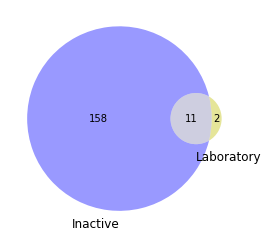

In [42]:
import matplotlib_venn as venn

subsets = [n12,n21,n11]
set_labels = ['Inactive','Laboratory']
set_colors = ['b','y']
venn.venn2(subsets, set_labels, set_colors, alpha=0.4)

fig = plt.gcf()
# fig.savefig('/home/laurence/ME/figures/efeU/enrich_lab_fragment_R02_062818.svg')
# fig.savefig('/home/laurence/ME/figures/efeU/enrich_lab_fragment_R02_062818.eps')
# fig.savefig('/home/laurence/ME/figures/efeU/enrich_lab_fragment_R02_062818.pdf')

In [43]:
df_kw[ df_kw.Count==1][['Genome','Genome ID','Count','TotLength']]['TotLength'].min()

831

# Isolation source

In [221]:
df234 = pd.read_csv('../df234.csv', dtype={'genome.genome_id':object})
df234.rename(columns={'genome.genome_id':'Genome ID'}, inplace=True)

In [223]:
df234.head()

,Genome ID,fragment1,fragment2,n_fragments,total_length
0,562.22905,99.0,720.0,2.0,819.0
1,562.23196,99.0,720.0,2.0,819.0
2,562.17619,111.0,807.0,2.0,918.0
3,562.17383,117.0,708.0,2.0,825.0
4,562.17387,117.0,708.0,2.0,825.0


In [247]:
df234_annot = pd.merge(df234, df_train[['Genome ID','Genome','Isolation Source','Isolation Comments']], on=['Genome ID'], how='left')

b = df234_annot['Isolation Source'].isnull()
df234_annot.loc[ b, 'Isolation Source'] = df234_annot[b]['Isolation Comments']
df234_annot = df234_annot[[c for c in df234_annot.columns if c != 'Isolation Comments']]
df234_annot['Isolation Source'].fillna('N/A', inplace=True)
df234_annot['source_simple'] = ''

In [248]:
for k,vs in src_map.items():
    for v in vs:
        for i,r in df234_annot.iterrows():
            if v.lower() in r['Isolation Source'].lower():
                df234_annot.loc[i, 'source_simple'] += k

In [249]:
df234_annot

,Genome ID,fragment1,fragment2,n_fragments,total_length,Genome,Isolation Source,source_simple
0,562.22905,99.0,720.0,2.0,819.0,Escherichia coli O2:H1 strain ECO0512,N/A,
1,562.23196,99.0,720.0,2.0,819.0,Escherichia coli O2:H1 strain ECO0818,N/A,
2,562.17619,111.0,807.0,2.0,918.0,Escherichia coli strain ECOR51,N/A,
3,562.17383,117.0,708.0,2.0,825.0,Escherichia coli strain ARS-CC2248,fecal grab,feces
4,562.17387,117.0,708.0,2.0,825.0,Escherichia coli strain ARS-CC2203,fecal composite,feces
5,562.17388,117.0,708.0,2.0,825.0,Escherichia coli strain ARS-CC2205,fecal composite,feces
6,562.1739,117.0,708.0,2.0,825.0,NaN,N/A,
7,752785.3,120.0,720.0,2.0,840.0,Escherichia coli 541-15,ileum,ileum
8,668369.7,120.0,720.0,2.0,840.0,Escherichia coli DH5[alpha],common laboratory strain,laboratory
9,562.9318,120.0,720.0,2.0,840.0,Escherichia coli strain DV133T,N/A,


In [250]:
df234_annot.to_csv('df234_isolation.csv', index=False)